<h2 style='color:blue' align='center'>Small Image Classification Using Convolutional Neural Network (CNN)</h2>

In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

<h4 style="color:purple">Load the dataset</h4>

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 11s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

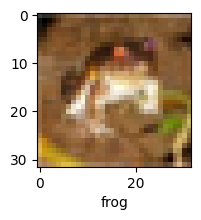

In [10]:
plot_sample(X_train, y_train, 0)

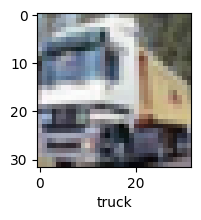

In [11]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

<h4 style="color:purple">Normalizing the training data</h4>

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<h4 style="color:purple">Build simple artificial neural network for image classification</h4>

In [13]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

In [14]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 3000)              9219000   
                                                                 
 dense_1 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_2 (Dense)             (None, 10)                10010     
                                                                 
Total params: 12230010 (46.65 MB)
Trainable params: 12230010 (46.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


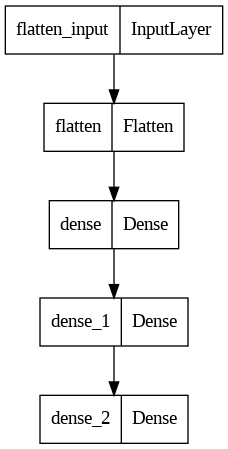

In [15]:
import pydot
from tensorflow import keras
keras.utils.plot_model(ann)

In [16]:
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 108s 69ms/step - loss: 1.8104 - accuracy: 0.3555
Epoch 2/5
1563/1563 [==============================] - 107s 68ms/step - loss: 1.6226 - accuracy: 0.4258
Epoch 3/5
1563/1563 [==============================] - 107s 68ms/step - loss: 1.5420 - accuracy: 0.4566
Epoch 4/5
1563/1563 [==============================] - 107s 69ms/step - loss: 1.4840 - accuracy: 0.4755
Epoch 5/5
1563/1563 [==============================] - 107s 69ms/step - loss: 1.4340 - accuracy: 0.4934


**You can see that at the end of 5 epochs, accuracy is at around 49%**

In [17]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 8s 25ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.25      0.00      0.00      1000
           1       0.09      0.48      0.15      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.11      0.38      0.17      1000
           7       0.00      0.00      0.00      1000
           8       0.08      0.09      0.08      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.05      0.10      0.04     10000
weighted avg       0.05      0.10      0.04     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# <h4 style="color:purple">Now let us build a **Convolutional Neural Network** to train our images</h4>

In [18]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [19]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_3 (Dense)             (None, 64)               

Number of parameters in a CONV layer would be :

((m * n * d)+1)* k), added 1 because of the bias term for each filter. The same expression can be written as follows:

((shape of width of the filter (m) * shape of height of the filter (n)* number of filters in the previous layer (d)+1)*number of filters (k)).

 Where the term “filter” refers to the number of filters in the current layer.


First Conv2D Layer= ((3x3x3) +1) x 32 = 896

---




Second Conv2D Layer = ((3x3x32)+1) x 64= 18496


Dense_3= (2304x64)+64= 147520


Dense_4=(64x10)+10=650







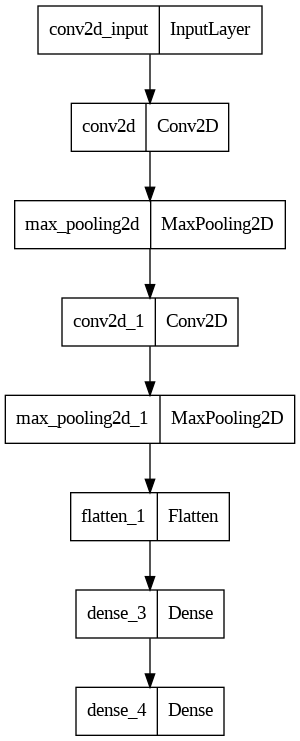

In [20]:
import pydot
from tensorflow import keras
keras.utils.plot_model(cnn)

In [21]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 63s 40ms/step - loss: 1.4480 - accuracy: 0.4794
Epoch 2/5
1563/1563 [==============================] - 58s 37ms/step - loss: 1.0914 - accuracy: 0.6175
Epoch 3/5
1563/1563 [==============================] - 59s 38ms/step - loss: 0.9679 - accuracy: 0.6621
Epoch 4/5
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8834 - accuracy: 0.6940
Epoch 5/5
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8131 - accuracy: 0.7188


**With CNN, at the end 5 epochs, accuracy was at around 71% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9235 - accuracy: 0.6911


[0.9234736561775208, 0.691100001335144]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[9.26456414e-03, 1.82335716e-04, 4.98478636e-02, 7.47161984e-01,
        2.45931037e-02, 3.31254639e-02, 1.54675571e-02, 2.33674000e-04,
        1.18000492e-01, 2.12293491e-03],
       [1.84411742e-03, 6.40677139e-02, 6.98547865e-07, 2.29192528e-06,
        2.05749984e-06, 2.92275049e-09, 2.51934251e-09, 1.37280365e-08,
        9.31486607e-01, 2.59646890e-03],
       [1.19592234e-01, 7.60919377e-02, 2.16701836e-03, 1.11218989e-02,
        5.02059644e-04, 6.09485251e-05, 4.94765933e-04, 1.98416528e-04,
        7.83849478e-01, 5.92121435e-03],
       [9.69143331e-01, 1.98457809e-03, 2.70448579e-03, 5.08353906e-03,
        8.91748723e-03, 5.39535722e-06, 1.84353485e-05, 5.27978918e-05,
        1.13983545e-02, 6.91629306e-04],
       [9.63401249e-07, 6.95410699e-06, 7.23234564e-02, 2.37378925e-02,
        4.12794650e-01, 1.52965274e-03, 4.89594191e-01, 1.94677182e-06,
        9.84260805e-06, 3.73872467e-07]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

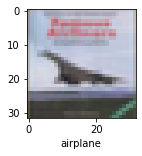

In [ ]:
plot_sample(X_test, y_test,3)

In [ ]:
classes[y_classes[3]]

'airplane'

In [ ]:
classes[y_classes[3]]

'airplane'